In [1]:
%matplotlib inline
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpim
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [2]:
"""local_zip = '/home/fabian/carclass.zip' #Zip File Location Path
zip_ref = zipfile.ZipFile(local_zip, 'r') # Read the local_zip
zip_ref.extractall('/home/fabian/') # All images will be located in /tmp/horse-or-man
zip_ref.close() # Close the File"""

"local_zip = '/home/fabian/carclass.zip' #Zip File Location Path\nzip_ref = zipfile.ZipFile(local_zip, 'r') # Read the local_zip\nzip_ref.extractall('/home/fabian/') # All images will be located in /tmp/horse-or-man\nzip_ref.close() # Close the File"

In [3]:
"""local_zip = '/home/fabian/carval.zip' #Zip File Location Path
zip_ref = zipfile.ZipFile(local_zip, 'r') # Read the local_zip
zip_ref.extractall('/home/fabian/') # All images will be located in /tmp/horse-or-man
zip_ref.close() # Close the File"""

"local_zip = '/home/fabian/carval.zip' #Zip File Location Path\nzip_ref = zipfile.ZipFile(local_zip, 'r') # Read the local_zip\nzip_ref.extractall('/home/fabian/') # All images will be located in /tmp/horse-or-man\nzip_ref.close() # Close the File"

In [4]:
train_ferrari_dir = os.path.join('/home/fabian/carclass/ferrari/train')
train_porsche_dir = os.path.join('/home/fabian/carclass/porsche/train')

validation_ferrari_dir = os.path.join('/home/fabian/carval/ferrari')
validation_porsche_dir = os.path.join('/home/fabian/carval/porsche')

In [5]:
train_ferrari_names = os.listdir(train_ferrari_dir)
print(train_ferrari_names[:10])

train_porsche_names = os.listdir(train_porsche_dir)
print(train_porsche_names[:10])

['945812.jpg', '757610.jpg', 'novitec_rosso_ferrari_458_speciale_2014-wide.jpg', 'wp2188196.jpg', 'ferrari-488-pista-2560x1440-2019-cars-supercar-19484.jpg', '2019-NOVITEC-Ferrari-Portofino-Front-Three-Quarter-Wallpaper-21.jpg', '2018-ferrari-portofino-4k-wallpaper-78149-3553871.png', 'ferrari_488_pista_4k_2018_2-HD.jpg', 'ferrari-berlinetta-f12-car-wallpaper-top-automotive-magazine.jpg', 'image15.jpeg']
['porsche-cayenne.jpg', '1641470.jpg', 'wp2676980.jpg', 'techart_porsche_cayenne_turbo_2018_3-HD.jpg', 'e0b7885428f49c520a23ab4bcd153580.jpg', 'porsche-918-spyder-wallpaper-1080p-188603.jpg', '180019.jpg', 'WP0AB2A99KS115453_36e3964a86754423.jpg', 'wp4412908.jpg', '2020-porsche-911-turbo.jpg']


In [6]:
print('total training ferrari images:', len(os.listdir(train_ferrari_dir)))
print('total training porsche images:', len(os.listdir(train_porsche_dir)))

total training ferrari images: 450
total training porsche images: 556


In [7]:
nrows = 4
ncols = 4

pic_index = 0

In [18]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 100
next_ferrari_pix = [os.path.join(train_ferrari_dir, fname) for fname in train_ferrari_names[pic_index-8:pic_index]]
next_porsche_pix = [os.path.join(train_porsche_dir, fname) for fname in train_porsche_names[pic_index-8:pic_index]]

next_ferrari_pix
next_porsche_pix

['/home/fabian/carclass/porsche/train/wp2144799.jpg',
 '/home/fabian/carclass/porsche/train/fSWgJM.jpg',
 '/home/fabian/carclass/porsche/train/2018-Porsche-718-Cayman-GTS-V2-1080.jpg',
 '/home/fabian/carclass/porsche/train/2020-Porsche-911-C4S-interior.jpg',
 '/home/fabian/carclass/porsche/train/2019-porsche-macan-suv-02.jpg',
 '/home/fabian/carclass/porsche/train/606393.jpg',
 '/home/fabian/carclass/porsche/train/355783.jpg',
 '/home/fabian/carclass/porsche/train/2019-Porsche-Macan-white-color-front-profile-4k-hd-wallpaper.jpg']

<Figure size 1152x1152 with 0 Axes>

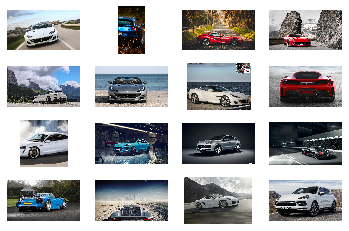

In [9]:
for i, img_path in enumerate(next_ferrari_pix+next_porsche_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [11]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy']) 

In [12]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/home/fabian/carclass/',  
        target_size=(300, 300),  
        batch_size=100,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        '/home/fabian/carval/',
        target_size=(300, 300), 
        batch_size=20,
        class_mode='binary')

Found 1004 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


In [17]:
history = model.fit(train_generator, steps_per_epoch=3, epochs=100, verbose=1, validation_data = validation_generator,
      validation_steps=8)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 3 steps, validate for 8 steps
Epoch 1/100
3/3 [==============================] - 19s 6s/step - loss: 0.5622 - accuracy: 0.7167 - val_loss: 0.8924 - val_accuracy: 0.6375
Epoch 2/100
3/3 [==============================] - 19s 6s/step - loss: 0.6830 - accuracy: 0.6500 - val_loss: 0.5895 - val_accuracy: 0.6500
Epoch 3/100
3/3 [==============================] - 19s 6s/step - loss: 0.5762 - accuracy: 0.7433 - val_loss: 0.5748 - val_accuracy: 0.6562
Epoch 4/100
3/3 [==============================] - 21s 7s/step - loss: 0.5673 - accuracy: 0.7100 - val_loss: 0.5659 - val_accuracy: 0.6562
Epoch 5/100
3/3 [==============================] - 23s 8s/step - loss: 0.5354 - accuracy: 0.7267 - val_loss: 0.6299 - val_accuracy: 0.6750
Epoch 6/100
3/3 [==============================] - 20s 7s/step - loss: 0.5894 - accuracy: 0.7067 - val_loss: 0.5770 - val_accuracy: 0.6687
Epoch 7/100
3/3 [==============================] - 22s 7s/step - loss: 0.608

In [14]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

ferrari_img_files = [os.path.join(train_ferrari_dir, f) for f in train_ferrari_names]
porsche_img_files = [os.path.join(train_porsche_dir, f) for f in train_porsche_names]
img_path = random.choice(ferrari_img_files + porsche_img_files)

img = load_img(img_path, target_size=(300, 300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 255

successive_feature_maps = visualization_model.predict(x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


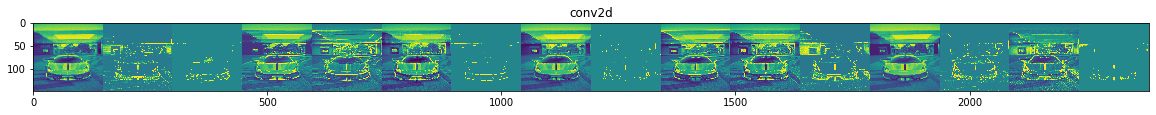

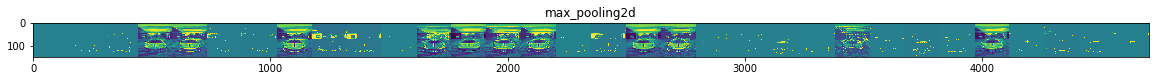

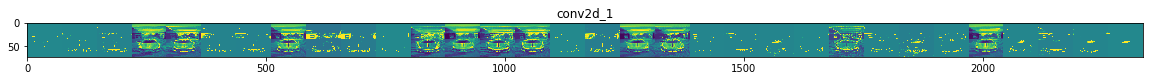

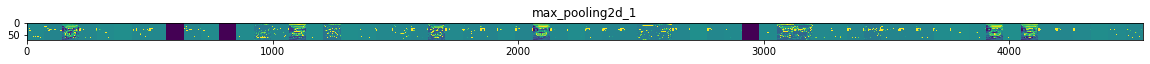

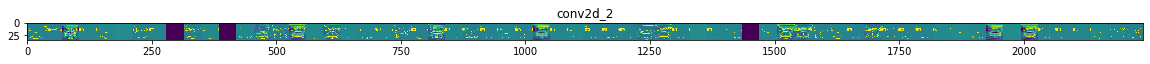

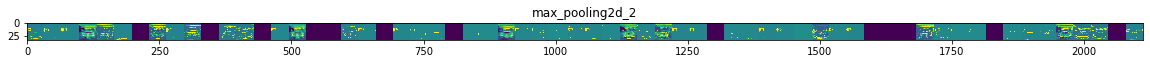

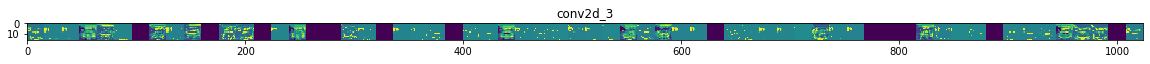

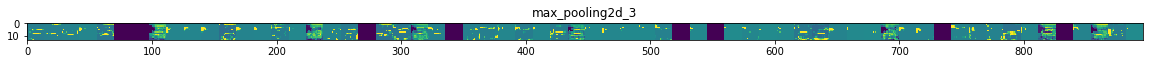

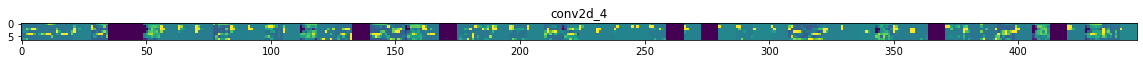

In [15]:
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]  
        size = feature_map.shape[1]
        
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x
        
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [16]:
import numpy as np
from tensorflow import keras
from keras.preprocessing import image

path = '/home/fabian/'
img = image.load_img(path, target_size=(300,300,3))
x = image.img_to_array(img)
    
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0]>0:
    print(path + " is a porsche")
else:
    print(path + " is a ferrari")

Using TensorFlow backend.


FileNotFoundError: [Errno 2] No such file or directory: '/home/fabian/carclass/porsche/validation/VixYnE.jpg'